In [1]:
####### Remove Warnings from the code #######
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

######## Import all necessity functions for machine Learning ########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif, mutual_info_regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SVMSMOTE, BorderlineSMOTE, KMeansSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, SGDClassifier, SGDRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, silhouette_score

######### Import all necessary functions for Neural Network ##########
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, ReLU, LeakyReLU, PReLU, ELU, BatchNormalization, Dropout
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, MSE, MAE, Huber
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Nadam, Adamax
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L1, L2, L1L2

In [2]:
###### Read the dataset #######
df = pd.read_csv('/content/Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [4]:
df.loc[:, 'differentiate'].value_counts()

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64

In [5]:
####### Label Encode the Target column #######
print(df.loc[:, 'Status'].value_counts())

df.loc[:, 'Status'] = df.loc[:, 'Status'].map({'Alive': 0, 'Dead': 1})

df.head()

Alive    3408
Dead      616
Name: Status, dtype: int64


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,0
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,0
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,0
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,0
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,0


In [6]:
print("Shape of this dataset = ", df.shape)

Shape of this dataset =  (4024, 16)


In [7]:
for column_ in ['Race', 'Marital Status', 'differentiate', 'A Stage', 'Estrogen Status', 'Progesterone Status']:
  print(f"{column_} has unique value = {df.loc[:, column_].nunique()}")

Race has unique value = 3
Marital Status has unique value = 5
differentiate has unique value = 4
A Stage has unique value = 2
Estrogen Status has unique value = 2
Progesterone Status has unique value = 2


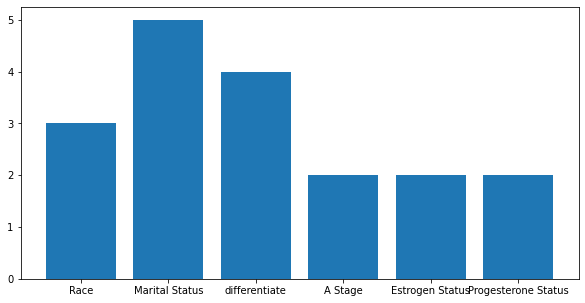

In [8]:
column_ = ['Race', 'Marital Status', 'differentiate', 'A Stage', 'Estrogen Status', 'Progesterone Status']
unique_ = []
for count_ in column_:
  unique_.append(df.loc[:, count_].nunique())
####### plot the figure #######
plt.figure(figsize = (10, 5))
plt.bar(column_, unique_)
plt.show()

In [9]:
print("T stage   = ", df.iloc[:, 3].nunique())
print("N Stage   = ", df.iloc[:, 4].nunique())
print("6th Stage = ", df.iloc[:, 5].nunique())

T stage   =  4
N Stage   =  3
6th Stage =  5


In [10]:
###### Do one Hot Encoding #######
df = pd.get_dummies(df, columns = ['Race', 'Marital Status', 'differentiate', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Grade'], drop_first = True)
df = pd.get_dummies(df, columns = ['T Stage ', 'N Stage', '6th Stage'], drop_first = True)

df.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,...,Grade_3,T Stage _T2,T Stage _T3,T Stage _T4,N Stage_N2,N Stage_N3,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC
0,68,4,24,1,60,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,50,35,14,5,62,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
2,58,63,14,7,75,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,58,18,2,1,84,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,47,41,3,1,50,0,0,1,1,0,...,1,1,0,0,0,0,1,0,0,0


In [11]:
df.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,...,Grade_3,T Stage _T2,T Stage _T3,T Stage _T4,N Stage_N2,N Stage_N3,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC
0,68,4,24,1,60,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,50,35,14,5,62,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
2,58,63,14,7,75,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,58,18,2,1,84,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,47,41,3,1,50,0,0,1,1,0,...,1,1,0,0,0,0,1,0,0,0


In [12]:
y = df.loc[:, 'Status']
df.drop(['Status'], axis = 1, inplace = True)
###### Scaling the data ######
StandardScaler_ = StandardScaler()
X = StandardScaler_.fit_transform(df)
###### Train and Test Split ######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print("X train shape = ", X_train.shape)
print("X Test shape  = ", X_test.shape)
print("y train shape = ", y_train.shape)
print("y test  shape = ", y_test.shape)

X train shape =  (2816, 29)
X Test shape  =  (1208, 29)
y train shape =  (2816,)
y test  shape =  (1208,)


In [13]:
xgboostClassifier_ = RandomForestClassifier()
xgboostClassifier_.fit(X_train, y_train)
predicted_ = xgboostClassifier_.predict(X_test)
print("accuracy score is  = ", accuracy_score(predicted_, y_test))
print("recall score is    = ", recall_score(predicted_, y_test))
print("precision score is = ", precision_score(predicted_, y_test))
print("f1_score  score is = ", f1_score(predicted_, y_test))

accuracy score is  =  0.9155629139072847
recall score is    =  0.8348623853211009
precision score is =  0.52
f1_score  score is =  0.6408450704225352


In [14]:
ADASYN_ = ADASYN()
X, y = ADASYN_.fit_resample(X, y)
X_train.shape, y.shape

((2816, 29), (6789,))

In [15]:
###### Train and Test Split ######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print("X train shape = ", X_train.shape)
print("X Test shape  = ", X_test.shape)
print("y train shape = ", y_train.shape)
print("y test  shape = ", y_test.shape)

X train shape =  (4752, 29)
X Test shape  =  (2037, 29)
y train shape =  (4752,)
y test  shape =  (2037,)


In [16]:
xgboostClassifier_ = RandomForestClassifier()
xgboostClassifier_.fit(X_train, y_train)
predicted_ = xgboostClassifier_.predict(X_test)
print("accuracy score is  = ", accuracy_score(predicted_, y_test))
print("recall score is    = ", recall_score(predicted_, y_test))
print("precision score is = ", precision_score(predicted_, y_test))
print("f1_score  score is = ", f1_score(predicted_, y_test))

accuracy score is  =  0.9185076092292587
recall score is    =  0.9131293188548865
precision score is =  0.922233300099701
f1_score  score is =  0.9176587301587301


In [17]:
from sklearn import metrics
model = Sequential()

model.add(Dense(units = 256, kernel_initializer = 'he_normal', activation = 'relu', input_dim = X.shape[1]))
model.add(Dropout(0.6))

model.add(Dense(units = 128, kernel_initializer = 'he_normal', activation = 'relu', kernel_regularizer = L2()))

model.add(Dense(units = 64, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss = BinaryCrossentropy(), metrics = ['accuracy'])

history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 128, verbose = 1)

Epoch 1/500
38/38 [==============================] - 1s 10ms/step - loss: 3.1384 - accuracy: 0.5947 - val_loss: 2.6675 - val_accuracy: 0.7089
Epoch 2/500
38/38 [==============================] - 0s 5ms/step - loss: 2.4977 - accuracy: 0.6761 - val_loss: 2.1825 - val_accuracy: 0.7653
Epoch 3/500
38/38 [==============================] - 0s 5ms/step - loss: 2.0397 - accuracy: 0.7060 - val_loss: 1.7853 - val_accuracy: 0.7658
Epoch 4/500
38/38 [==============================] - 0s 5ms/step - loss: 1.6701 - accuracy: 0.7218 - val_loss: 1.4673 - val_accuracy: 0.7791
Epoch 5/500
38/38 [==============================] - 0s 6ms/step - loss: 1.3864 - accuracy: 0.7336 - val_loss: 1.2259 - val_accuracy: 0.7801
Epoch 6/500
38/38 [==============================] - 0s 5ms/step - loss: 1.1663 - accuracy: 0.7321 - val_loss: 1.0401 - val_accuracy: 0.7820
Epoch 7/500
38/38 [==============================] - 0s 5ms/step - loss: 1.0103 - accuracy: 0.7473 - val_loss: 0.8997 - val_accuracy: 0.7855
Epoch 8/500


In [18]:
predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)
print("accuracy score is  = ", accuracy_score(predicted_, y_test))
print("recall score is    = ", recall_score(predicted_, y_test))
print("precision score is = ", precision_score(predicted_, y_test))
print("f1_score  score is = ", f1_score(predicted_, y_test))

accuracy score is  =  0.905252822778596
recall score is    =  0.8763940520446096
precision score is =  0.9401794616151545
f1_score  score is =  0.9071669071669072


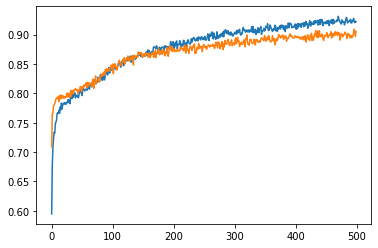

In [19]:
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')

In [ ]:
plt.plot(history_.history['l'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')